<a href="https://colab.research.google.com/github/B-V-SAI-PRANAV/DATA-ANALYTICS-PROJECTS-/blob/main/Sugarcane_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
import os
print(os.getcwd())  # Prints current working directory


/content


In [46]:
print(os.listdir())

['.config', 'List of Countries by Sugarcane Production.csv', 'sample_data']


In [47]:
df=pd.read_csv('/content/List of Countries by Sugarcane Production.csv')

In [48]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [49]:
df.shape

(103, 7)

**Data Cleaning**

In [50]:
df['Production (Tons)']=df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace(".","")
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace(".","")


In [51]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [52]:
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"ProductionperPerson(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)


In [53]:
df.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Production(Tons)',
       'ProductionperPerson(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

In [54]:
df.isna().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production(Tons),0
ProductionperPerson(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


In [55]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [56]:
df.dropna().reset_index()

,index,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,"43596,5"
98,98,98,Lebanon,Asia,97,16,3,"28386,4"
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,"11949,8"


In [57]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [58]:
df.columns

Index(['Country', 'Continent', 'Production(Tons)', 'ProductionperPerson(Kg)',
       'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

In [59]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,India,Asia,348448000,260721,4950000,"70393,5"
2,China,Asia,123059739,88287,1675215,"73459,1"
3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,Pakistan,Asia,65450704,324219,1130820,57879


In [60]:
df.dtypes




,0
Country,object
Continent,object
Production(Tons),object
ProductionperPerson(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [61]:
df['ProductionperPerson(Kg)'] = df['ProductionperPerson(Kg)'].str.replace(',', '').astype(float)
df['Production(Tons)'] = df['Production(Tons)'].str.replace(',', '').astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].str.replace(',', '').astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].str.replace(',', '').astype(float)


In [62]:
df['ProductionperPerson(Kg)']=df['ProductionperPerson(Kg)'].astype(float)
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)


In [63]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
ProductionperPerson(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


In [64]:
df.nunique()

,0
Country,103
Continent,6
Production(Tons),103
ProductionperPerson(Kg),102
Acreage(Hectare),101
Yield(Kg/Hectare),102


**Univariate Analysis**

In [65]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


How many countries produce sugarcane from each continent


In [66]:
df['Continent'].value_counts()

,count
Continent,
Africa,39
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

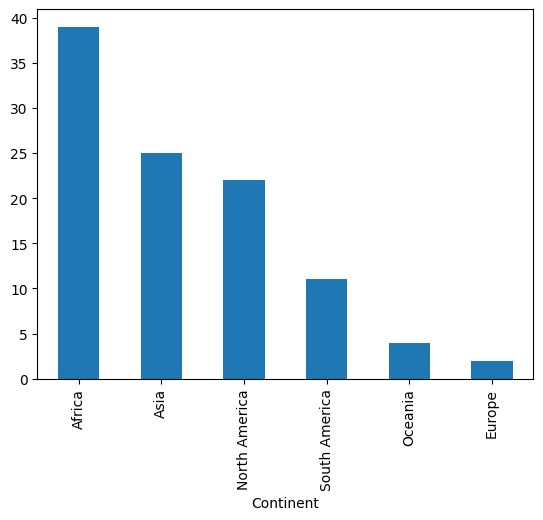

In [67]:
df['Continent'].value_counts().plot(kind='bar')

to know the distribution use distplot


<ipython-input-68-e06712db19e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])


<Axes: xlabel='Production(Tons)', ylabel='Density'>

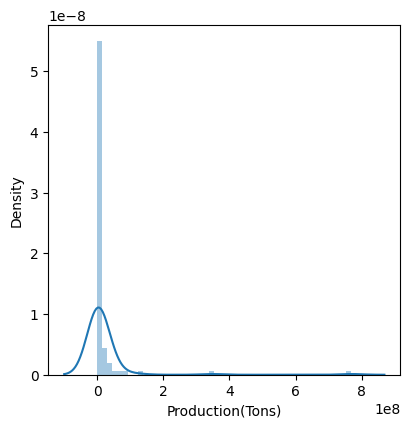

In [68]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])

<ipython-input-69-995df904b2fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ProductionperPerson(Kg)'])


<Axes: xlabel='ProductionperPerson(Kg)', ylabel='Density'>

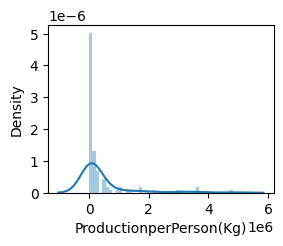

In [69]:
plt.subplot(2,2,1)
sns.distplot(df['ProductionperPerson(Kg)'])

<ipython-input-70-e104a3820634>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Acreage(Hectare)'])


<Axes: xlabel='Acreage(Hectare)', ylabel='Density'>

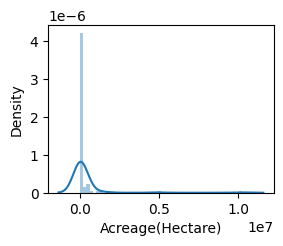

In [70]:
plt.subplot(2,2,1)
sns.distplot(df['Acreage(Hectare)'])

<ipython-input-71-a8d7023cd47f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Kg/Hectare)'])


<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

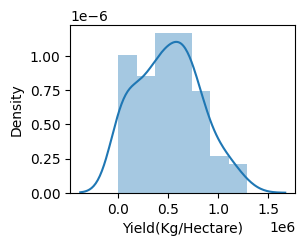

In [71]:
plt.subplot(2,2,1)
sns.distplot(df['Yield(Kg/Hectare)'])

<Axes: ylabel='Production(Tons)'>

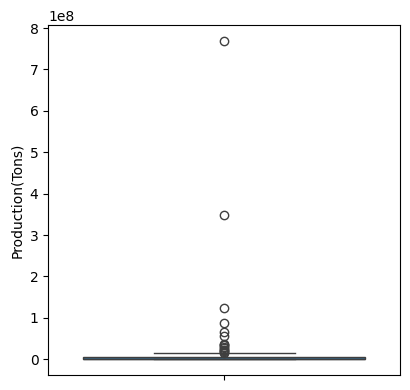

In [72]:
# to know the outliers use boxplot
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])




<Axes: ylabel='ProductionperPerson(Kg)'>

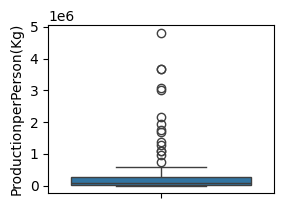

In [73]:
plt.subplot(2,2,1)
sns.boxplot(df['ProductionperPerson(Kg)'])

<Axes: ylabel='Acreage(Hectare)'>

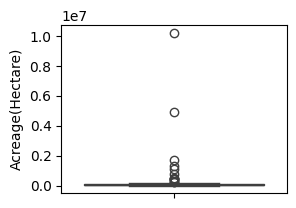

In [74]:
plt.subplot(2,2,1)
sns.boxplot(df['Acreage(Hectare)'])

<Axes: ylabel='Yield(Kg/Hectare)'>

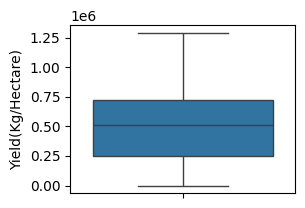

In [75]:
plt.subplot(2,2,1)
sns.boxplot(df['Yield(Kg/Hectare)'])

In [76]:
df.describe()

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,1.030000e+02,1.020000e+02,1.020000e+02
mean,1.832407e+07,4.084763e+05,2.498981e+05,5.018502e+05
std,8.379760e+07,8.636106e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,4.298850e+04,1.015600e+04,1.104000e+03,2.487505e+05
50%,1.422432e+06,7.960600e+04,1.655800e+04,5.102500e+05
75%,6.145648e+06,2.755895e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


**Bivariate Analysis**

In [77]:
#which country produces more sugarcane
df_new=df[['Country','Production(Tons)']].set_index('Country')

In [78]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [79]:
df.columns

Index(['Country', 'Continent', 'Production(Tons)', 'ProductionperPerson(Kg)',
       'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

In [80]:
df_new['Production(Tons)_Perc']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()


In [81]:
df_new

,Production(Tons),Production(Tons)_Perc
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_Perc'>

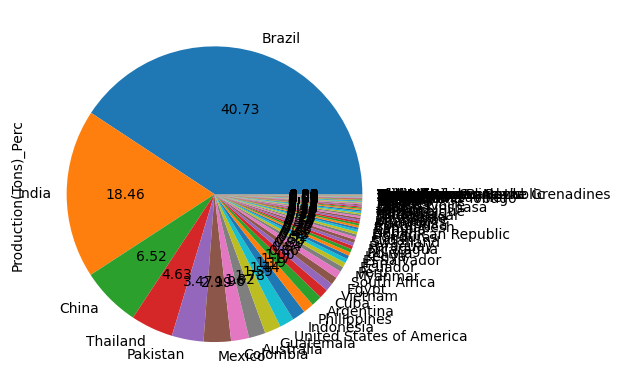

In [82]:
df_new['Production(Tons)_Perc'].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

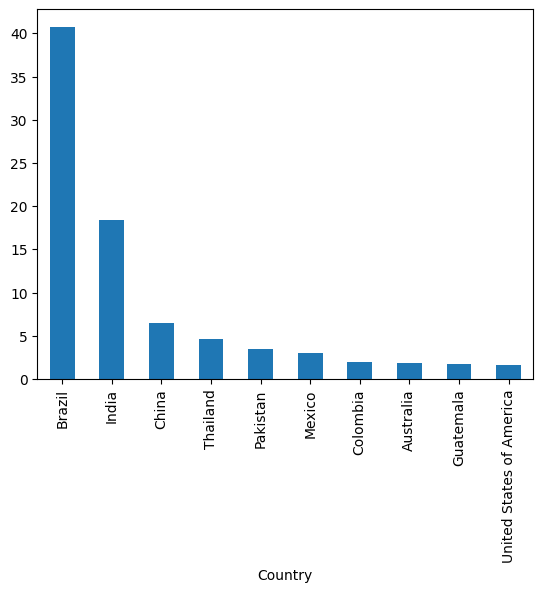

In [83]:
df_new['Production(Tons)_Perc'].head(10).plot(kind="bar")

<ipython-input-84-347b47c5739c>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


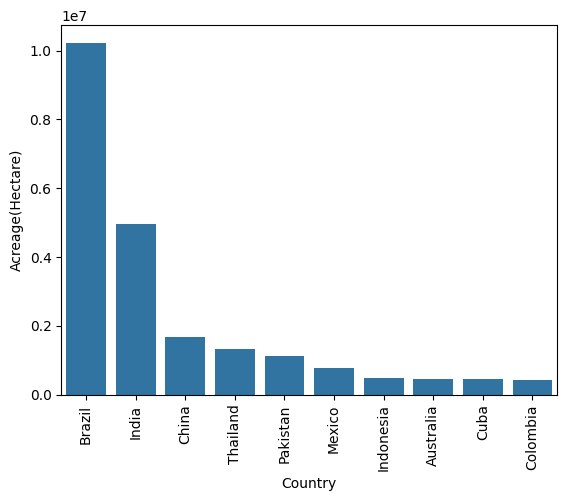

In [84]:
#country with highest land ->brazil
df_acr=df.sort_values("Acreage(Hectare)",ascending=False)
ax=sns.barplot(data=df_acr.head(10), x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


<ipython-input-85-19bbaed08b14>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


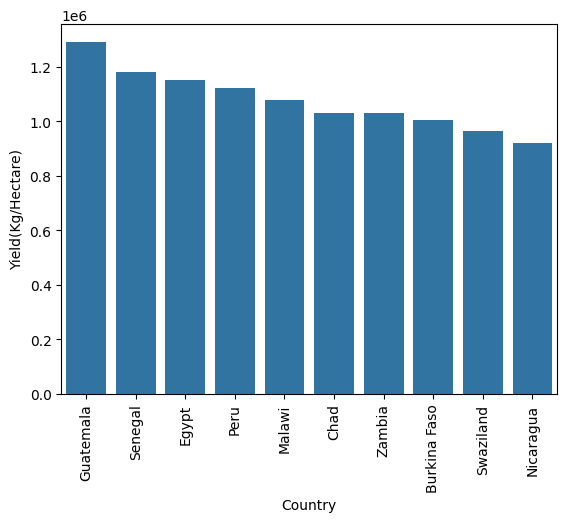

In [85]:
#country with highest yield per heactre ->Guantemala
df=df.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=df.head(10), x="Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<ipython-input-90-6da9d7bf3f74>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


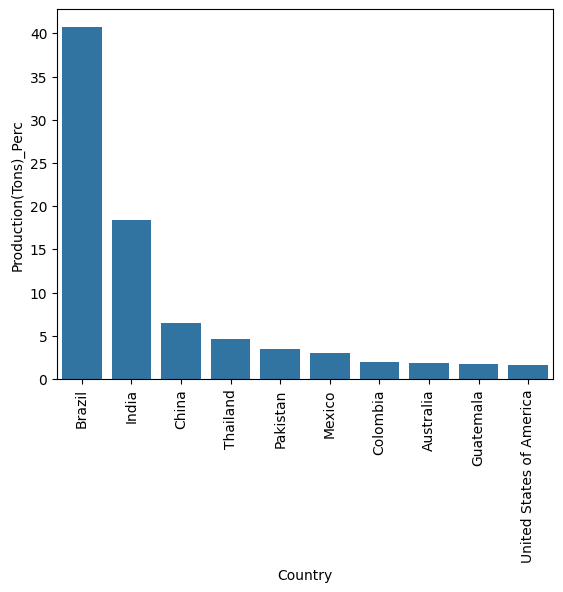

In [90]:
#country with highest production->brazil
df_new=df_new.sort_values("Production(Tons)_Perc",ascending=False)
ax=sns.barplot(data=df_new.head(10), x="Country",y="Production(Tons)_Perc")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [89]:
print(df.columns)

Index(['Country', 'Continent', 'Production(Tons)', 'ProductionperPerson(Kg)',
       'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')


In [91]:
#correaltion
df.corr()

ValueError: could not convert string to float: 'Guatemala'

In [92]:
print(df.dtypes)

Country                     object
Continent                   object
Production(Tons)           float64
ProductionperPerson(Kg)    float64
Acreage(Hectare)           float64
Yield(Kg/Hectare)          float64
dtype: object


In [93]:
df_numeric = df.select_dtypes(include=['number'])  # Keeps only numeric columns
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                         Production(Tons)  ProductionperPerson(Kg)  \
Production(Tons)                 1.000000                 0.352920   
ProductionperPerson(Kg)          0.352920                 1.000000   
Acreage(Hectare)                 0.997550                 0.341974   
Yield(Kg/Hectare)                0.121125                 0.226719   

                         Acreage(Hectare)  Yield(Kg/Hectare)  
Production(Tons)                 0.997550           0.121125  
ProductionperPerson(Kg)          0.341974           0.226719  
Acreage(Hectare)                 1.000000           0.107826  
Yield(Kg/Hectare)                0.107826           1.000000  


In [94]:
df_numeric.corr()


,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.352920,0.997550,0.121125
ProductionperPerson(Kg),0.352920,1.000000,0.341974,0.226719
Acreage(Hectare),0.997550,0.341974,1.000000,0.107826
Yield(Kg/Hectare),0.121125,0.226719,0.107826,1.000000


<Axes: >

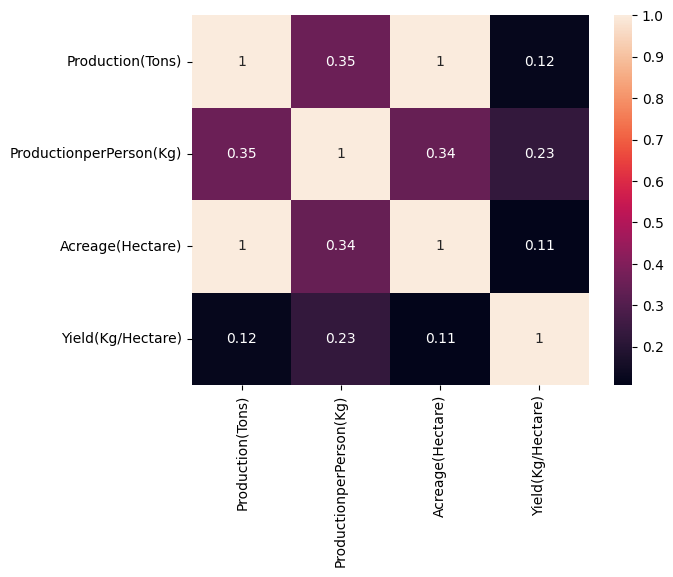

In [96]:
sns.heatmap(df_numeric.corr(),annot=True)

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

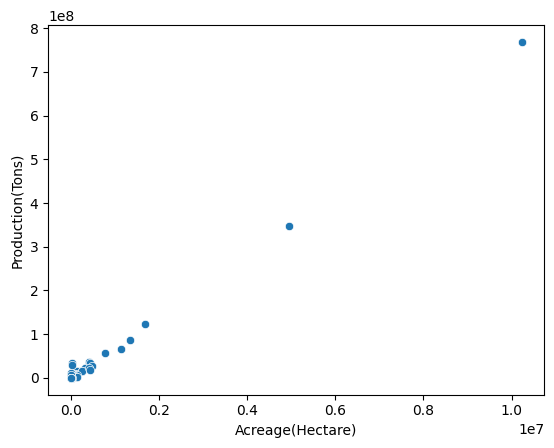

In [97]:
#do countries with highest land produce more sugarcane ?
sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

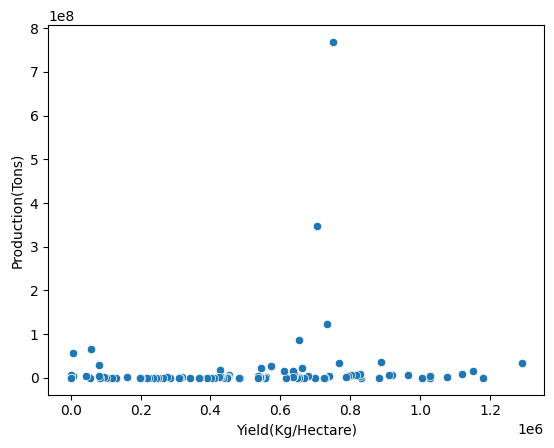

In [98]:
#do countries which yield more sugarcane per hectare produces more sugarcane in total
sns.scatterplot(data=df,x="Yield(Kg/Hectare)",y="Production(Tons)")

**Analysis for Content**

In [102]:
df_continent=df.groupby("Continent").sum()
df_continent

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,SenegalEgyptMalawiChadZambiaBurkina FasoSwazil...,89681525.0,10144161.0,1439089.0,20700454.0
Asia,SyriaIranChinaIndiaTaiwanThailandMalaysiaMyanm...,721930425.0,3120808.0,10608319.0,11197308.0
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0
North America,GuatemalaNicaraguaEl SalvadorHondurasAntigua a...,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0
South America,PeruColombiaEcuadorBrazilArgentinaVenezuelaGuy...,865588126.0,10228540.0,11369236.0,6766896.0


In [109]:
df['Continent'].value_counts()

,count
Continent,
Africa,39
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


In [106]:
#continent producing maximum sugar cane -South america
df_continent["Production(Tons)"].sort_values(ascending=False)

,Production(Tons)
Continent,
South America,865588126.0
Asia,721930425.0
North America,173995947.0
Africa,89681525.0
Oceania,36177574.0
Europe,5823.0


<Axes: xlabel='Continent'>

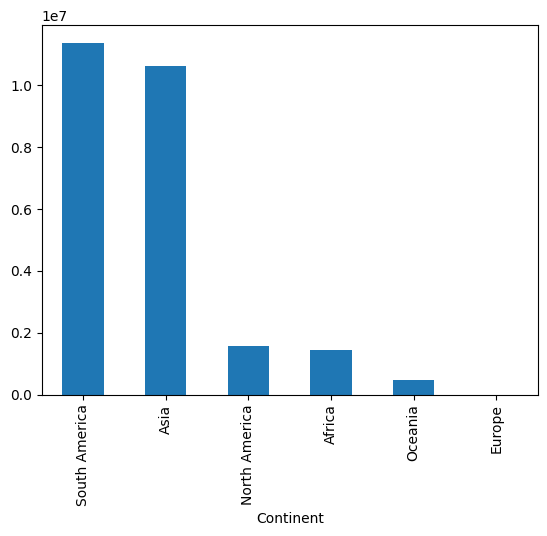

In [111]:
#contry with more land for production of sugarcane th -South America
df_continent['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

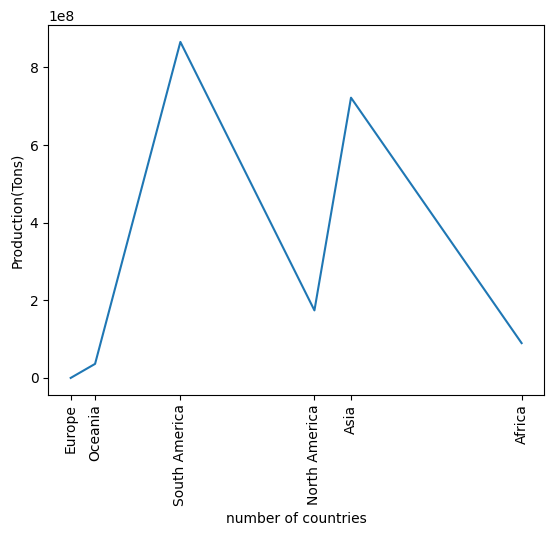

In [122]:
#do number of countries in a continent effects production of sugarcane -no
df_continent['number of countries']=df.groupby("Continent").count()['Country']
continent_name=df_continent.index.to_list()

sns.lineplot(data=df_continent,x="number of countries",y="Production(Tons)")
plt.xticks(df_continent["number of countries"],continent_name,rotation=90)
plt.show()

<Axes: ylabel='Production(Tons)'>

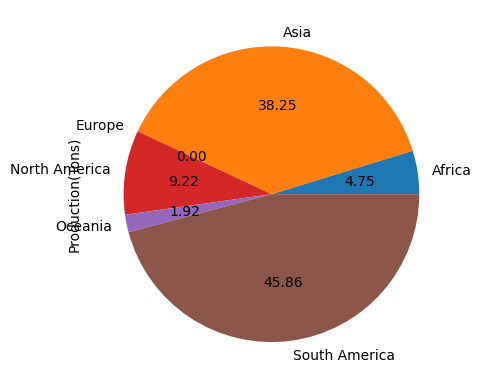

In [126]:
#production distribution by continent
df_continent['Production(Tons)'].plot(kind='pie',autopct="%.2f")


In [127]:
#correlation for continent
df_numeric = df_continent.select_dtypes(include=['number'])  # Keeps only numeric columns
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                         Production(Tons)  ProductionperPerson(Kg)  \
Production(Tons)                 1.000000                 0.143098   
ProductionperPerson(Kg)          0.143098                 1.000000   
Acreage(Hectare)                 0.994897                 0.073058   
Yield(Kg/Hectare)                0.104312                 0.514927   
number of countries              0.098495                 0.522610   

                         Acreage(Hectare)  Yield(Kg/Hectare)  \
Production(Tons)                 0.994897           0.104312   
ProductionperPerson(Kg)          0.073058           0.514927   
Acreage(Hectare)                 1.000000           0.126764   
Yield(Kg/Hectare)                0.126764           1.000000   
number of countries              0.122407           0.986439   

                         number of countries  
Production(Tons)                    0.098495  
ProductionperPerson(Kg)             0.522610  
Acreage(Hectare)                    0.122407  
Yield(

In [128]:
df_numeric.corr()

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),number of countries
Production(Tons),1.000000,0.143098,0.994897,0.104312,0.098495
ProductionperPerson(Kg),0.143098,1.000000,0.073058,0.514927,0.522610
Acreage(Hectare),0.994897,0.073058,1.000000,0.126764,0.122407
Yield(Kg/Hectare),0.104312,0.514927,0.126764,1.000000,0.986439
number of countries,0.098495,0.522610,0.122407,0.986439,1.000000
